<h4>Linear regression</h4>

In [172]:
import numpy as np
import matplotlib.pyplot as plt

In [173]:
#height of people in cms
x=np.array([[151],[174],[138],[186],[128],[136],[179],[163],[152],[131]])

#weight of people in kgs
y=np.array([63,81,56,91,47,57,76,72,62,48])

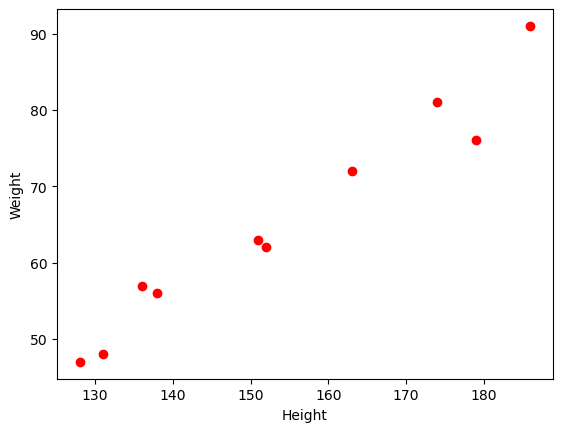

In [174]:
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x,y,color='r')

In [175]:
from sklearn.linear_model import LinearRegression

In [176]:
#create the object
regressor=LinearRegression()

In [177]:
#train the algo
regressor.fit(x,y)

LinearRegression()

In [178]:
#m
regressor.coef_

array([0.67461045])

In [179]:
#c
regressor.intercept_

-38.45508707607698

In [180]:
regressor.predict([[185]])

array([86.34784601])

<h4>Calculate value of slope</h4>

In [182]:
num = len(x) * np.sum(x.flatten() * y) - np.sum(x.flatten()) * np.sum(y)
den = len(x) * np.sum(x.flatten()**2) - (np.sum(x.flatten()))**2
m=num/den

In [183]:
m

0.6746104491292392

In [184]:
np.sum(x),np.sum(y)

(1538, 653)

In [185]:
c=y-m*x

In [186]:
c=np.mean(c)

In [187]:
c

-38.45508707607698

In [188]:
Y=168*m+c
Y

74.8794683776352

<h4>Dataset</h4>

In [190]:
df=pd.read_csv('C:/Users/duasp/datasets/Salary_Data.csv')

In [191]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [192]:
x=df[['YearsExperience']]
y=df['Salary']

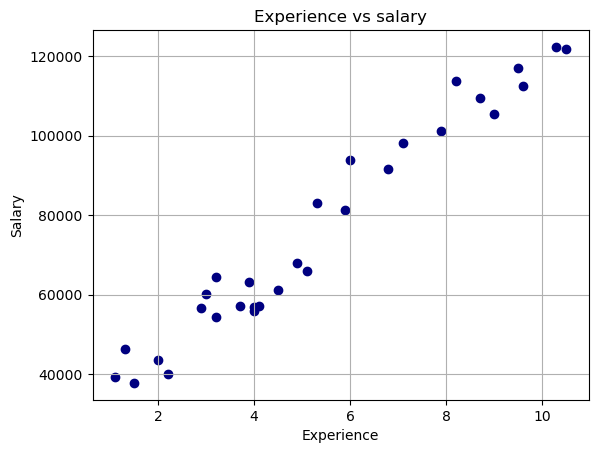

In [193]:
plt.title('Experience vs salary')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='navy');

<h4>cross validation</h4>

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [197]:
x_train.shape

(22, 1)

In [198]:
x_test.shape

(8, 1)

In [199]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


In [200]:
from sklearn.linear_model import LinearRegression

In [201]:
regressor=LinearRegression()

In [202]:
regressor.fit(x_train,y_train)

LinearRegression()

In [203]:
regressor.intercept_

26986.691316737248

In [204]:
regressor.coef_

array([9379.71049195])

In [205]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0


In [206]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
Name: Salary, dtype: float64

In [214]:
y_pred=regressor.predict(x_test)

In [216]:
result = pd.DataFrame({
    "Experience": x_test.values.flatten(),
    "Salary":y_test,
    "Predicted by Algo":y_pred
})

<H4>MEAN absolute error</H4>

In [219]:
abs(y_test-y_pred).mean()

3508.5455930660555

In [221]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3508.5455930660555

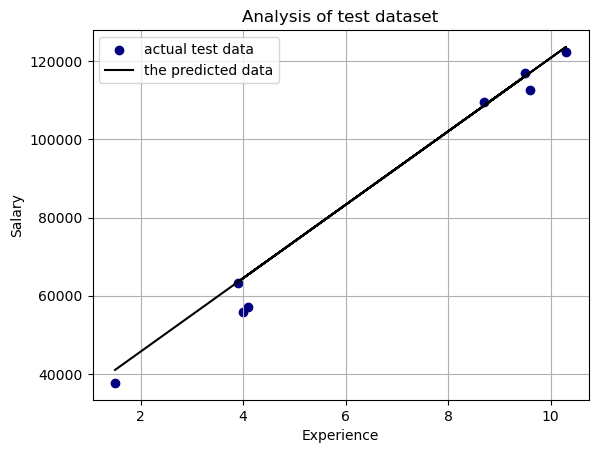

In [228]:
plt.title('Analysis of test dataset')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x_test,y_test,color='navy',label='actual test data');
plt.plot(x_test,y_pred,color='black',label='the predicted data');
plt.legend()

In [236]:
y_pred=regressor.predict(x)

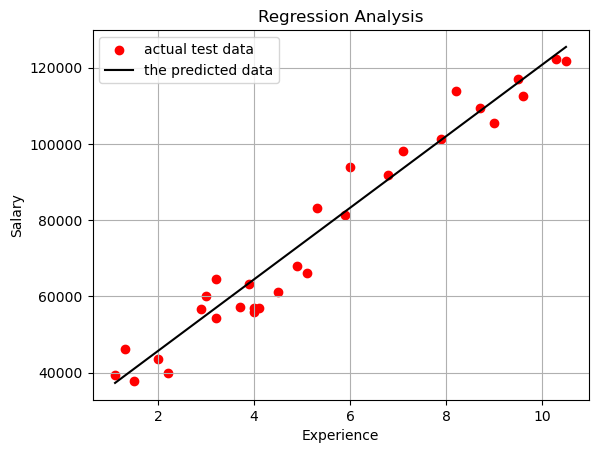

In [242]:
plt.title('Regression Analysis')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='red',label='actual test data');
plt.plot(x,y_pred,color='black',label='the predicted data');
plt.legend()

y_pred.max()

In [246]:
df['YearsExperience'].max()

10.5

In [252]:
regressor.predict([[20]])

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([214580.90115566])

In [254]:
regressor.predict([[25]])

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([261479.45361539])

<h4>R-sqaured error</h4>

In [257]:
regressor.score(x,y)

0.955975487542377

In [259]:
from sklearn.metrics import r2_score

In [267]:
#accuracy (should be one for perfect)
r2_score(y,y_pred)

0.955975487542377

In [269]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_pred)

4724.65759422699

In [271]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y,y_pred)

0.07278049089506371

In [277]:
#mean ssqared error
np.mean((y-y_pred)**2)

31983775.798633035

In [279]:
#root mean squared error
np.sqrt(np.mean((y-y_pred)**2))

5655.4200373299445

In [281]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

31983775.798633035